# dramsim3-sweep
9/19/2023

Sweep ChampSim with DRAMsim3 and vanilla model at different bandwidths

In [10]:
import json
import os
from typing import List, Optional
import sys

from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../../"))
from plot_utils import collate, plot

# Configuration

In [11]:
sim_dir = "/u/cmolder/GitHub/ChampSim-merge/sim/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim-merge/external/naboo/conf/weights.toml"

suites = [
    "spec06",
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150

In [12]:
%%capture
reload(collate)
study_kwargs = {
    "baseline_study": baseline_study,
    "baseline_experiment": baseline_experiment,
    "weights_path": weights_path,
    "experiments": ["_baseline"],
}
studies = {
    # ChampSim DRAM model
    "csim_1866": collate.StudyCollator(os.path.join(sim_dir, "dram_champsim", "default_1866"), "baseline", **study_kwargs),   
    "csim_2133": collate.StudyCollator(os.path.join(sim_dir, "dram_champsim", "default_2133"), "baseline", **study_kwargs),   
    "csim_2400": collate.StudyCollator(os.path.join(sim_dir, "dram_champsim", "default_2400"), "baseline", **study_kwargs),   
    "csim_2666": collate.StudyCollator(os.path.join(sim_dir, "dram_champsim", "default_2666"), "baseline", **study_kwargs),   
    "csim_2933": collate.StudyCollator(os.path.join(sim_dir, "dram_champsim", "default_2933"), "baseline", **study_kwargs),   
    "csim_3200": collate.StudyCollator(os.path.join(sim_dir, "dram_champsim", "default_3200"), "baseline", **study_kwargs),
    # DRAMsim3 DRAM model
    "ds3_1866": collate.StudyCollator(os.path.join(sim_dir, "dram_dramsim3", "default_1866"), "baseline", **study_kwargs),   
    "ds3_2133": collate.StudyCollator(os.path.join(sim_dir, "dram_dramsim3", "default_2133"), "baseline", **study_kwargs),   
    "ds3_2400": collate.StudyCollator(os.path.join(sim_dir, "dram_dramsim3", "default_2400"), "baseline", **study_kwargs),   
    "ds3_2666": collate.StudyCollator(os.path.join(sim_dir, "dram_dramsim3", "default_2666"), "baseline", **study_kwargs),   
    "ds3_2933": collate.StudyCollator(os.path.join(sim_dir, "dram_dramsim3", "default_2933"), "baseline", **study_kwargs),   
    "ds3_3200": collate.StudyCollator(os.path.join(sim_dir, "dram_dramsim3", "default_3200"), "baseline", **study_kwargs),          
}

# Cross-benchmark

In [13]:
data_df = {
    'ChampSim 1866 MT/s': studies["csim_1866"]["_baseline"],
    'ChampSim 2133 MT/s': studies["csim_2133"]["_baseline"],
    'ChampSim 2400 MT/s': studies["csim_2400"]["_baseline"],
    'ChampSim 2666 MT/s': studies["csim_2666"]["_baseline"],
    'ChampSim 2933 MT/s': studies["csim_2933"]["_baseline"],
    'ChampSim 3200 MT/s': studies["csim_3200"]["_baseline"],

    'DRAMsim3 1866 MT/s': studies["ds3_1866"]["_baseline"],
    'DRAMsim3 2133 MT/s': studies["ds3_2133"]["_baseline"],
    'DRAMsim3 2400 MT/s': studies["ds3_2400"]["_baseline"],
    'DRAMsim3 2666 MT/s': studies["ds3_2666"]["_baseline"],
    'DRAMsim3 2933 MT/s': studies["ds3_2933"]["_baseline"],
    'DRAMsim3 3200 MT/s': studies["ds3_3200"]["_baseline"],
}
data_colors = defaultdict(lambda: None, {
    'ChampSim 1866 MT/s': colormaps["Greens"](0.0),
    'ChampSim 2133 MT/s': colormaps["Greens"](0.2),
    'ChampSim 2400 MT/s': colormaps["Greens"](0.4),
    'ChampSim 2666 MT/s': colormaps["Greens"](0.6),
    'ChampSim 2933 MT/s': colormaps["Greens"](0.8),
    'ChampSim 3200 MT/s': colormaps["Greens"](1.0),

    'DRAMsim3 1866 MT/s': colormaps["Blues"](0.0),
    'DRAMsim3 2133 MT/s': colormaps["Blues"](0.2),
    'DRAMsim3 2400 MT/s': colormaps["Blues"](0.4),
    'DRAMsim3 2666 MT/s': colormaps["Blues"](0.6),
    'DRAMsim3 2933 MT/s': colormaps["Blues"](0.8),
    'DRAMsim3 3200 MT/s': colormaps["Blues"](1.0),
})
data_hatches = defaultdict(lambda: None, {

})

data_legend_kwargs = {
    'ncol': 3,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

data_legend_kwargs_wide = {
    'ncol': 6,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

data_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

## IPC

In [5]:
reload(plot)
plot.get_benchmark_table(
    data_df, "spec06", "cpu.gmean.ipc",
    add_mean=True).T

,ChampSim 1866 MT/s,ChampSim 2133 MT/s,ChampSim 2400 MT/s,ChampSim 2666 MT/s,ChampSim 2933 MT/s,ChampSim 3200 MT/s,DRAMsim3 1866 MT/s,DRAMsim3 2133 MT/s,DRAMsim3 2400 MT/s,DRAMsim3 2666 MT/s,DRAMsim3 2933 MT/s,DRAMsim3 3200 MT/s
GemsFDTD,0.350000,0.340000,0.360000,0.370000,0.370000,0.390000,0.700000,0.700000,0.75000,0.770000,0.780000,0.810000
lbm,0.510000,0.500000,0.540000,0.550000,0.560000,0.580000,0.750000,0.780000,0.85000,0.880000,0.910000,0.960000
libquantum,0.510000,0.490000,0.540000,0.550000,0.560000,0.580000,0.540000,0.530000,0.57000,0.560000,0.560000,0.590000
mcf,0.110000,0.100000,0.110000,0.110000,0.110000,0.120000,0.120000,0.120000,0.12000,0.120000,0.120000,0.130000
soplex,0.440000,0.430000,0.460000,0.460000,0.470000,0.480000,0.500000,0.500000,0.52000,0.530000,0.530000,0.550000
gmean,0.337918,0.324207,0.350791,0.355317,0.359429,0.376416,0.442732,0.444553,0.46893,0.474814,0.479243,0.504874


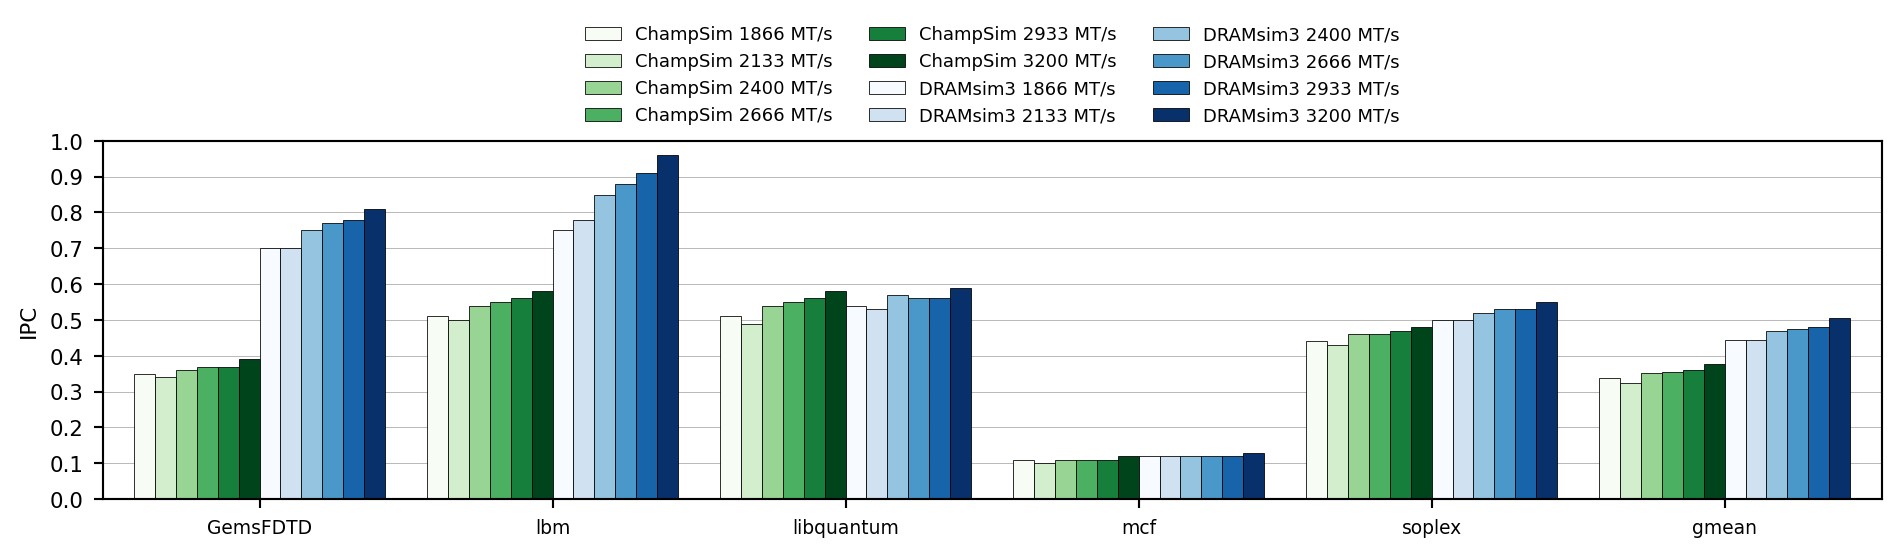

In [6]:
reload(plot)
plot.plot_benchmark_statistic(
    data_df, "spec06", "cpu.gmean.ipc",
    add_mean=True,
    colors=data_colors,
    legend_kwargs=data_legend_kwargs,
    label_kwargs=data_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC',
    ylim=(0, 1),
    ytick_distance=0.1,
    dpi=192, figsize=(10, 3))
#plt.savefig('./spec06_ipc.pdf')

## LLC avg miss latency

In [7]:
reload(plot)
plot.get_benchmark_table(
    data_df, "spec06", "cache.LLC.amean.avg_miss_latency",
    add_mean=True).T

,ChampSim 1866 MT/s,ChampSim 2133 MT/s,ChampSim 2400 MT/s,ChampSim 2666 MT/s,ChampSim 2933 MT/s,ChampSim 3200 MT/s,DRAMsim3 1866 MT/s,DRAMsim3 2133 MT/s,DRAMsim3 2400 MT/s,DRAMsim3 2666 MT/s,DRAMsim3 2933 MT/s,DRAMsim3 3200 MT/s
GemsFDTD,942.15,983.520,911.060,902.530,888.740,845.600,300.400,291.890,268.220,259.120,252.660,239.030
lbm,760.65,766.630,714.880,698.750,685.710,650.670,439.030,417.450,372.130,355.230,341.420,316.960
libquantum,269.68,259.910,232.750,219.380,208.430,194.320,286.280,295.940,263.530,271.630,278.110,255.280
mcf,298.97,312.630,291.390,288.820,286.600,272.930,221.520,224.630,209.470,206.180,203.730,194.480
soplex,352.85,357.070,328.600,320.900,314.490,296.890,273.200,268.670,244.820,239.850,236.390,221.440
amean,524.86,535.952,495.736,486.076,476.794,452.082,304.086,299.716,271.634,266.402,262.462,245.438


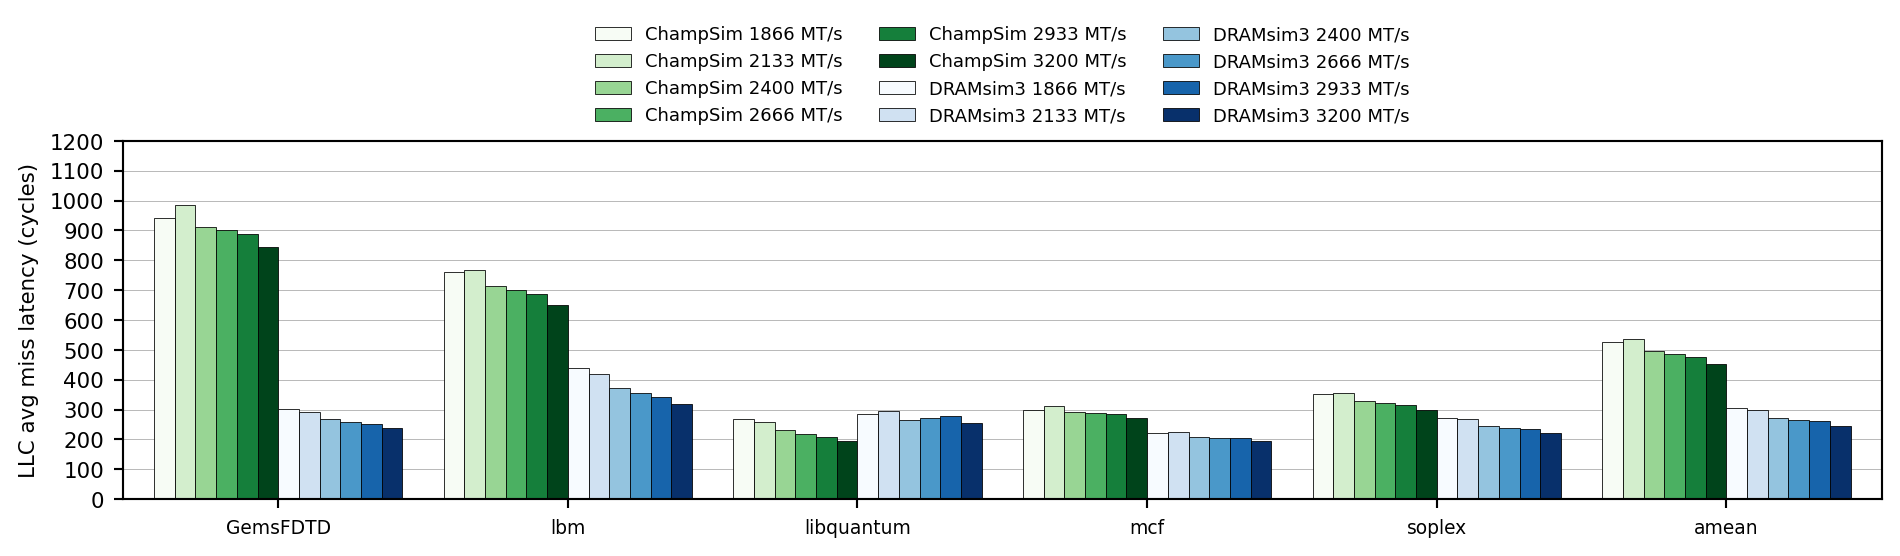

In [8]:
reload(plot)
plot.plot_benchmark_statistic(
    data_df, "spec06", "cache.LLC.amean.avg_miss_latency",
    add_mean=True,
    colors=data_colors,
    legend_kwargs=data_legend_kwargs,
    label_kwargs=data_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='LLC avg miss latency (cycles)',
    ylim=(0, 1200),
    ytick_distance=100,
    dpi=192, figsize=(10, 3))
#plt.savefig('./spec06_llc_miss_latency.pdf')

## Row buffer hit rate
Reads only

In [9]:
reload(plot)
plot.get_benchmark_table(
    data_df, "spec06", "dram.amean.read_row_hit_rate",
    add_mean=True).T

,ChampSim 1866 MT/s,ChampSim 2133 MT/s,ChampSim 2400 MT/s,ChampSim 2666 MT/s,ChampSim 2933 MT/s,ChampSim 3200 MT/s,DRAMsim3 1866 MT/s,DRAMsim3 2133 MT/s,DRAMsim3 2400 MT/s,DRAMsim3 2666 MT/s,DRAMsim3 2933 MT/s,DRAMsim3 3200 MT/s
GemsFDTD,0.320,0.32,0.320,0.320,0.320,0.320,0.800,0.800,0.800,0.800,0.800,0.800
lbm,0.320,0.32,0.320,0.330,0.330,0.330,0.810,0.820,0.820,0.820,0.820,0.820
libquantum,0.620,0.60,0.630,0.620,0.620,0.630,0.970,0.970,0.970,0.970,0.970,0.970
mcf,0.050,0.05,0.050,0.050,0.050,0.050,0.190,0.190,0.190,0.190,0.190,0.190
soplex,0.410,0.41,0.410,0.410,0.410,0.410,0.810,0.810,0.810,0.810,0.810,0.810
amean,0.344,0.34,0.346,0.346,0.346,0.348,0.716,0.718,0.718,0.718,0.718,0.718


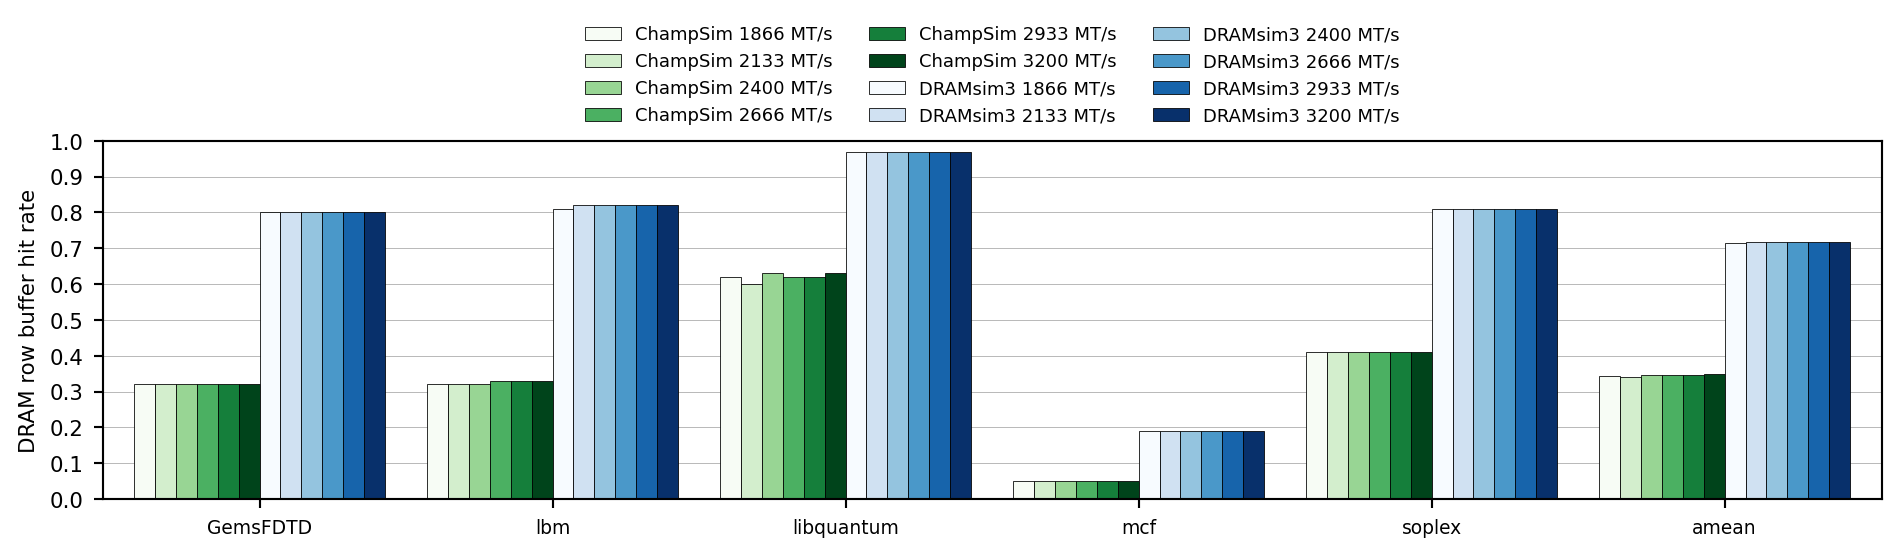

In [10]:
reload(plot)
plot.plot_benchmark_statistic(
    data_df, "spec06", "dram.amean.read_row_hit_rate",
    add_mean=True,
    colors=data_colors,
    legend_kwargs=data_legend_kwargs,
    label_kwargs=data_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='DRAM row buffer hit rate',
    ylim=(0, 1),
    ytick_distance=0.1,
    dpi=192, figsize=(10, 3))
#plt.savefig('./spec06_dram_row_hit_rate.pdf')

# Benchmark

In [17]:
def plot_dram_sweep(data_df, benchmark, 
                    metric: str = "cache.LLC.amean.avg_miss_latency", 
                    ymax: Optional[float] = None):
    table = plot.get_benchmark_table(data_df, "all", metric, add_mean=True)
    table_data = table[benchmark]
    X_champsim, y_champsim = [], []
    X_dramsim3, y_dramsim3 = [], []
    
    for index, row in table_data.items():
        index_type = index.split()[0] + (" (halfclk)" if index.split()[-1] == "(halfclk)" else "")
        index_speed = int(index.split()[1])
        if index_type == "DRAMsim3":
            X_dramsim3.append(index_speed)
            y_dramsim3.append(row)
        elif index_type == "ChampSim":
            X_champsim.append(index_speed)
            y_champsim.append(row)

    fig, ax = plt.subplots(figsize=(5, 3), dpi=dpi)

    ax.plot(X_dramsim3, y_dramsim3, label="DRAMsim3", marker='o', color=colormaps["Blues"](0.6))
    ax.plot(X_champsim, y_champsim, label="ChampSim", marker='o', color=colormaps["Greens"](0.6))
    ax.set_xlabel("DRAM data rate (MT/s)")
    ax.set_ylabel(metric.split('.')[-1].replace('_', ' '))
    ax.set_ylim(0, ymax)#, 1000)
    # ax.set_yticklabels(np.arange(0, 1200, 50))
    ax.grid(axis='both', color='lightgray')
    ax.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol=3, fontsize=7.5)#, fontsize=6.75)

    # def mtps_to_gibps(x):
    #     return x * 8 * 0.000931322574615478515625
    
    # def gibps_to_mtps(x):
    #     return x / 8 / 0.000931322574615478515625

    # secax = ax.secondary_xaxis('top', functions=(mtps_to_gibps, gibps_to_mtps))
    # secax.set_xlabel('DRAM bandwidth (GiB/s)')

    ax.set_title(benchmark)

    # Save plots
    benchmark_ = benchmark
    metric_str = {
        'cpu.gmean.ipc': 'ipc',
        'cache.LLC.amean.avg_miss_latency': 'llc_miss_latency_avg',
        'dram.amean.read_row_hit_rate': 'dram_row_hit_rate',
        'dram.amean.avg_read_latency': 'dram_read_latency_avg',
        'dram.amean.avg_write_latency': 'dram_write_latency_avg',
        'dram.amean.avg_interarrival_latency': 'dram_interarrival_latency_avg',
    }
    if benchmark_.endswith("mean"):
        benchmark_ = "_mean"
    
    os.makedirs(f"./plots", exist_ok=True)
    #plt.savefig(f"./plots/{benchmark_}.{metric_str[metric]}.pdf", bbox_inches="tight")
    plt.savefig(f"./plots/{benchmark_}.{metric_str[metric]}.png", bbox_inches="tight")

In [81]:
def plot_dram_sweep_multiplot(data_df, benchmarks: List[str], 
                              metric: str = "cache.LLC.amean.avg_miss_latency", 
                              ymax: Optional[float] = None):
    
    fig, axs = plt.subplots(2, 3, figsize=(10, 5))
    axs = axs.flatten()

    for i, benchmark in enumerate(benchmarks):
        table = plot.get_benchmark_table(data_df, "all", metric, add_mean=True)
        table_data = table[benchmark]
        X_champsim, y_champsim = [], []
        X_dramsim3, y_dramsim3 = [], []
        
        for index, row in table_data.items():
            index_type = index.split()[0] + (" (halfclk)" if index.split()[-1] == "(halfclk)" else "")
            index_speed = int(index.split()[1])
            if index_type == "DRAMsim3":
                X_dramsim3.append(index_speed)
                y_dramsim3.append(row)
            elif index_type == "ChampSim":
                X_champsim.append(index_speed)
                y_champsim.append(row)

        X_champsim = np.array(X_champsim)
        X_dramsim3 = np.array(X_dramsim3)
        y_champsim = np.array(y_champsim)
        y_dramsim3 = np.array(y_dramsim3)
        # Possibly normalize to CPU cycles
        if "dram" in metric and "latency" in metric:
            y_champsim = y_champsim / X_champsim * 4000
            y_dramsim3 = y_dramsim3 / (X_dramsim3 / 2) * 4000

        ax = axs[i]
        ax.plot(X_dramsim3, y_dramsim3, label="DRAMsim3" if i == 0 else None, marker='o', color=colormaps["Blues"](0.6))
        ax.plot(X_champsim, y_champsim, label="ChampSim" if i == 0 else None, marker='o', color=colormaps["Greens"](0.6))

        if i >= 3:
            ax.set_xlabel("DRAM data rate (MT/s)")
        if i % 3 == 0:
            ax.set_ylabel(metric.split('.')[-1].replace('_', ' '))
        ax.set_ylim(0, ymax)#, 1000)
        # ax.set_yticklabels(np.arange(0, 1200, 50))
        ax.grid(axis='both', color='lightgray')


        fig.legend(loc='lower center', ncol=3, fontsize=7.5)#, fontsize=6.75)
        ax.set_title(benchmark)

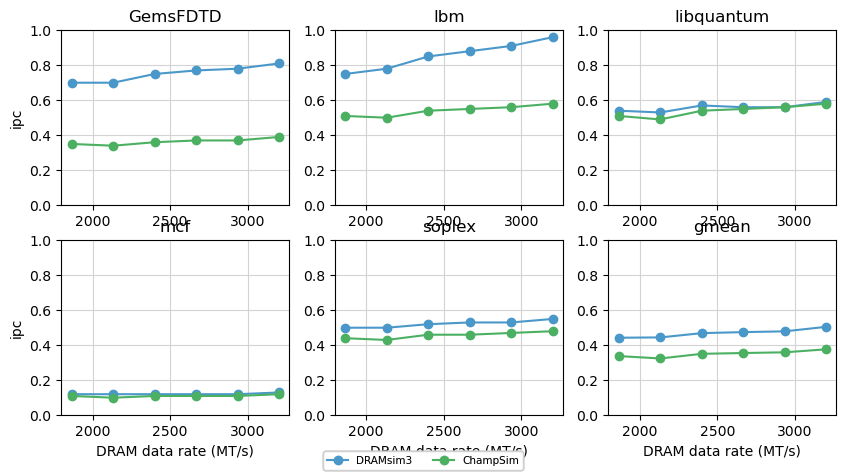

In [82]:
plot_dram_sweep_multiplot(data_df, ["GemsFDTD", "lbm", "libquantum", "mcf", "soplex", "gmean"], 
                          metric="cpu.gmean.ipc", 
                          ymax=1.0)

## LLC avg miss latency

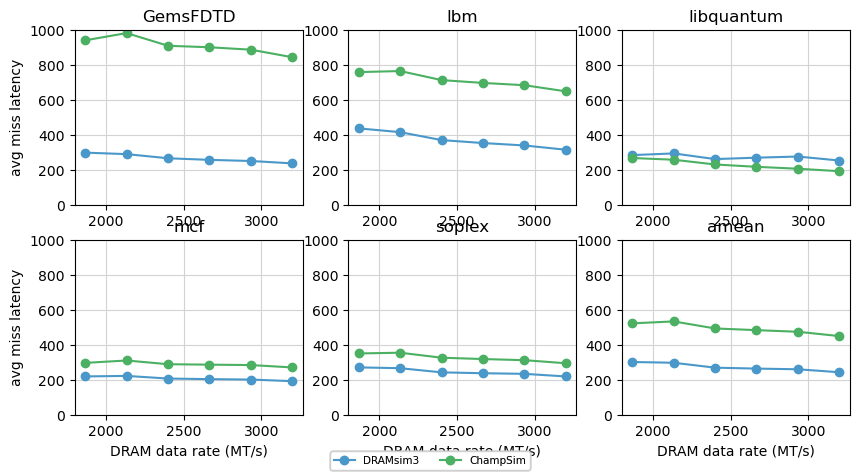

In [83]:
plot_dram_sweep_multiplot(data_df, ["GemsFDTD", "lbm", "libquantum", "mcf", "soplex", "amean"], 
                          metric="cache.LLC.amean.avg_miss_latency",
                          ymax=1000)

## Row buffer hit rate

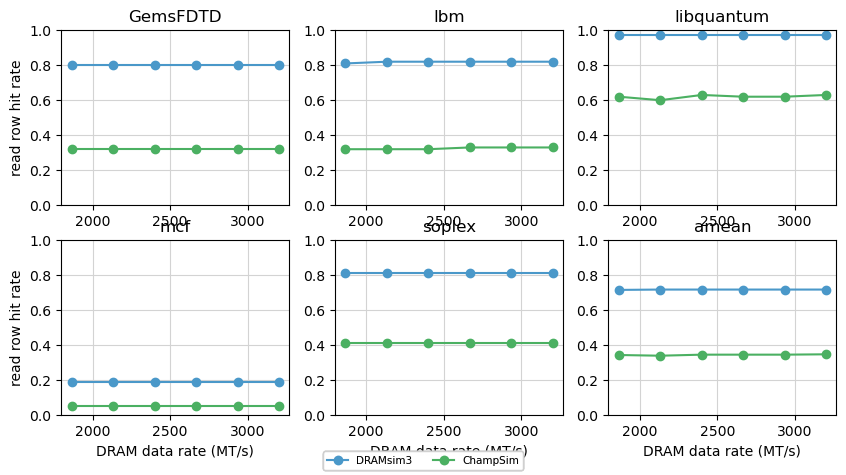

In [84]:
plot_dram_sweep_multiplot(data_df, ["GemsFDTD", "lbm", "libquantum", "mcf", "soplex", "amean"], 
                          metric="dram.amean.read_row_hit_rate", 
                          ymax=1.0)

## Avg. read latency

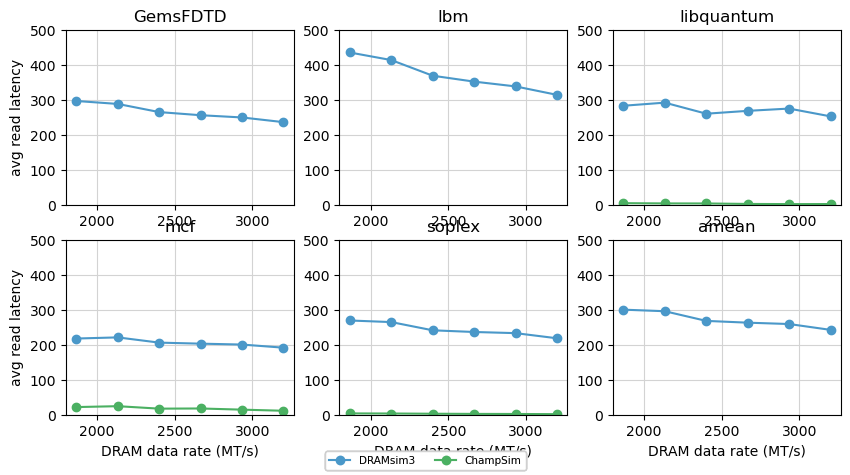

In [90]:
plot_dram_sweep_multiplot(data_df, ["GemsFDTD", "lbm", "libquantum", "mcf", "soplex", "amean"], 
                          metric="dram.amean.avg_read_latency", ymax=500)

## Avg. interarrival latency

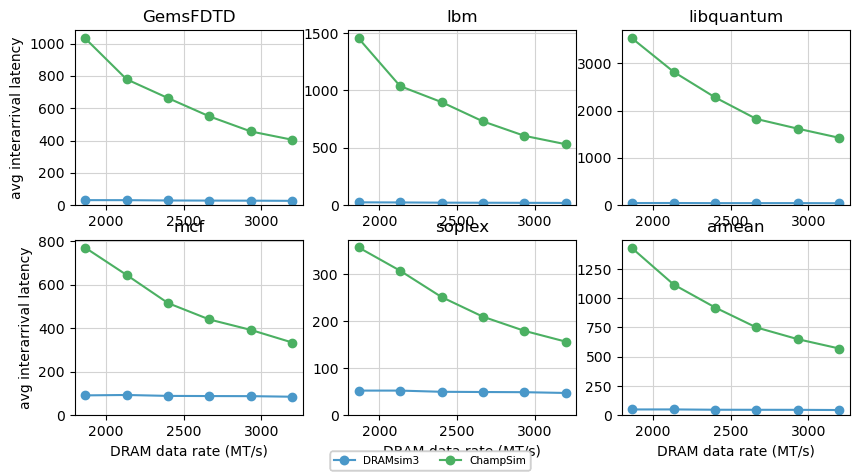

In [87]:
plot_dram_sweep_multiplot(data_df, ["GemsFDTD", "lbm", "libquantum", "mcf", "soplex", "amean"], 
                          metric="dram.amean.avg_interarrival_latency")

# Trace analysis

In [48]:
traces = {
    "GemsFDTD": "GemsFDTD_109B",
    "libquantum": "libquantum_1210B",
    "mcf": "mcf_46B",
}

In [62]:
def plot_latency_histogram(json_path: str, min = 0, max = 1000, bins = 20,
                           trace_name="", metric_name="read latency histogram"):
    with open(json_path, 'r') as f:
        data = json.load(f)

    is_dramsim3 = json_path.endswith(".dramsim3.json")
    if is_dramsim3:
        # DRAMsim3
        data = data["0"][metric_name.replace(" histogram", "").replace(" ", "_")]
    else:
        # ChampSim
        data = data[0]["roi"]["DRAM"][0][metric_name]
    data = dict(sorted({int(k): v for k, v in data.items()}.items()))

    fig, ax = plt.subplots(figsize=(5, 3), dpi=dpi)
    ax.hist(data.keys(), bins=bins, weights=data.values(), range=(min, max), color = 'C3' if is_dramsim3 else 'C0')

    ax.set_title(f"{trace_name} {metric_name}")
    ax.set_xlabel("latency (cycles)")
    ax.set_ylabel("count")

    fig.show()

## Read latency histogram
### ChampSim

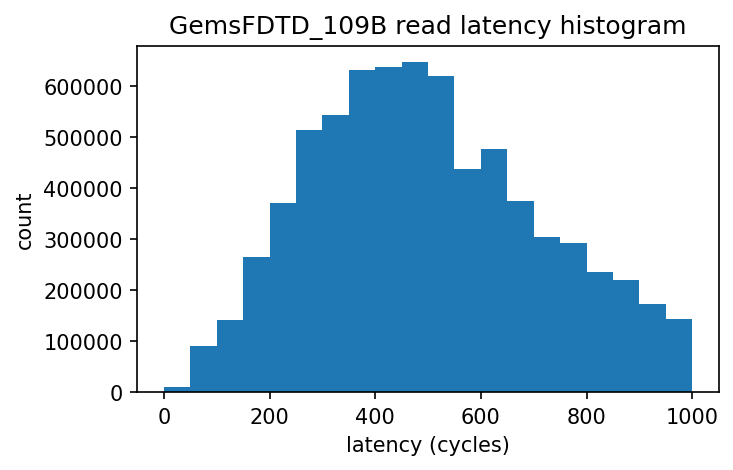

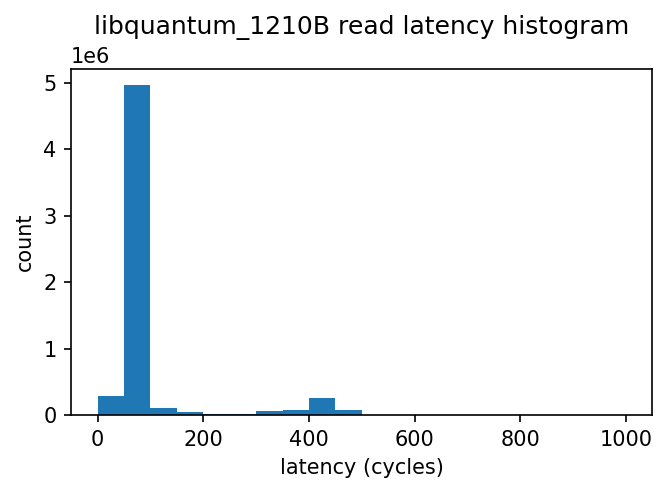

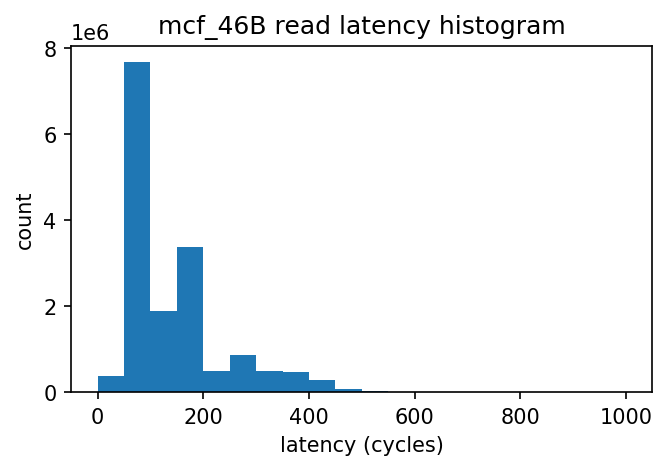

In [71]:
for benchmark, trace in traces.items():
    path = os.path.join(
        sim_dir, "dram_champsim", "default_1866", "baseline", "_baseline", benchmark, f"{trace}.json"
    )
    plot_latency_histogram(path, trace_name=trace, metric_name="read latency histogram")

### DRAMsim3

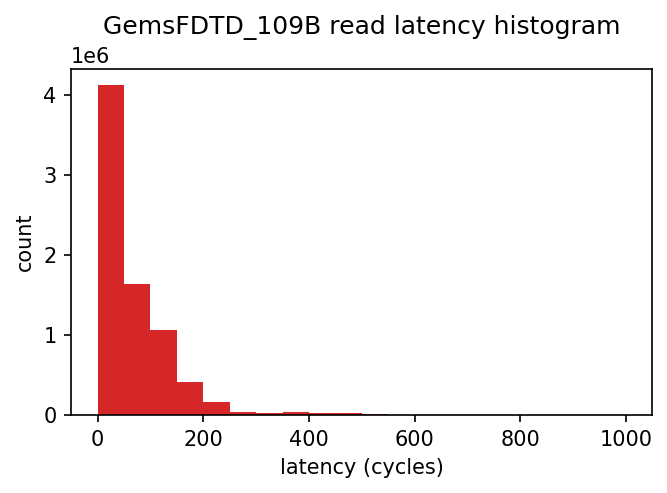

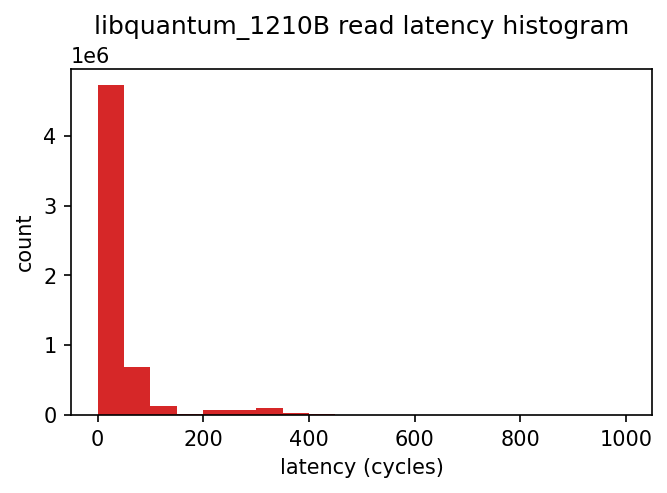

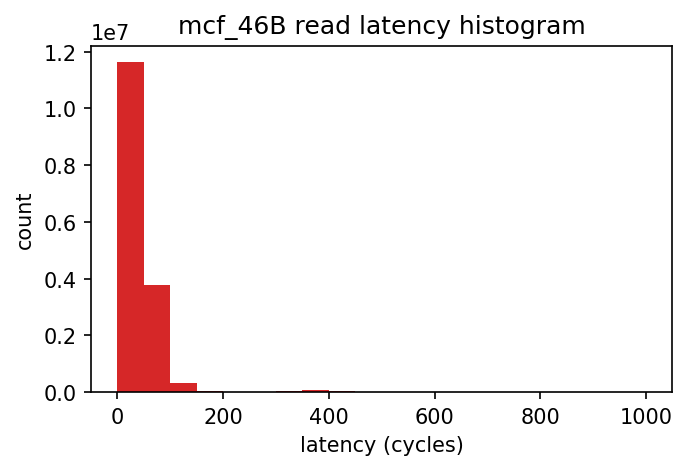

In [70]:
for benchmark, trace in traces.items():
    path = os.path.join(
        sim_dir, "dram_dramsim3", "default_1866", "baseline", "_baseline", benchmark, f"{trace}.dramsim3.json"
    )
    plot_latency_histogram(path, trace_name=trace, metric_name="read latency histogram")

## Write latency histogram

### ChampSim

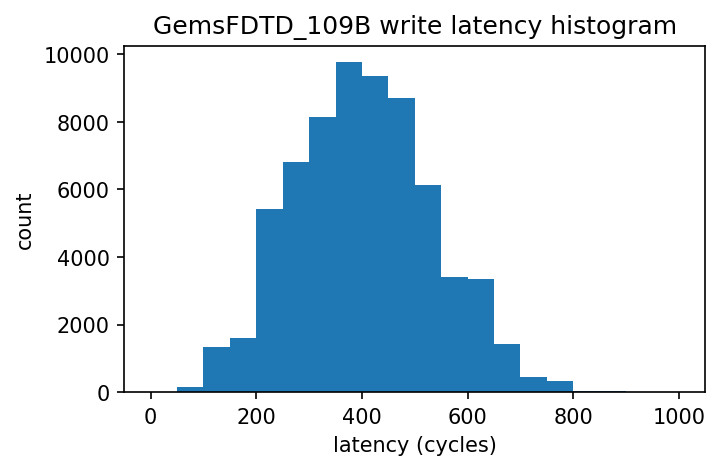

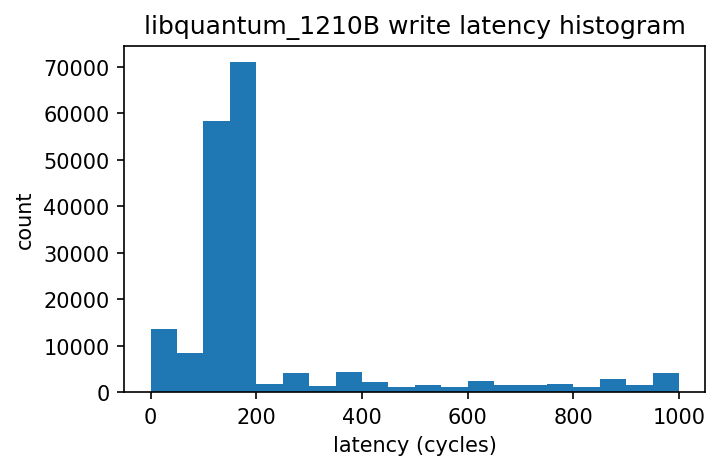

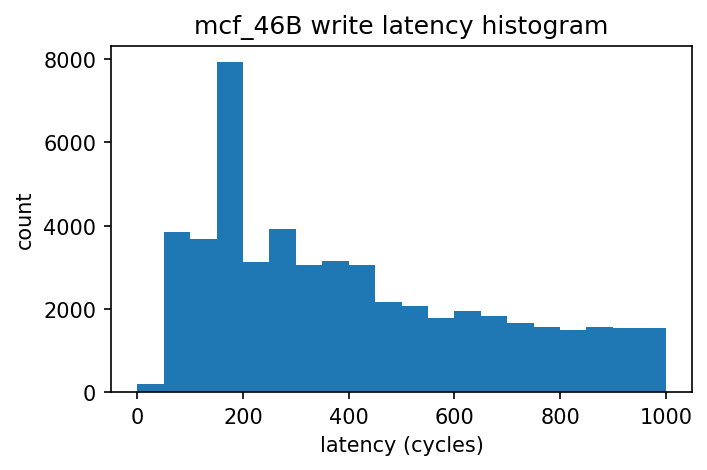

In [69]:
for benchmark, trace in traces.items():
    path = os.path.join(
        sim_dir, "dram_champsim", "default_1866", "baseline", "_baseline", benchmark, f"{trace}.json"
    )
    plot_latency_histogram(path, trace_name=trace, metric_name="write latency histogram")

### DRAMsim3

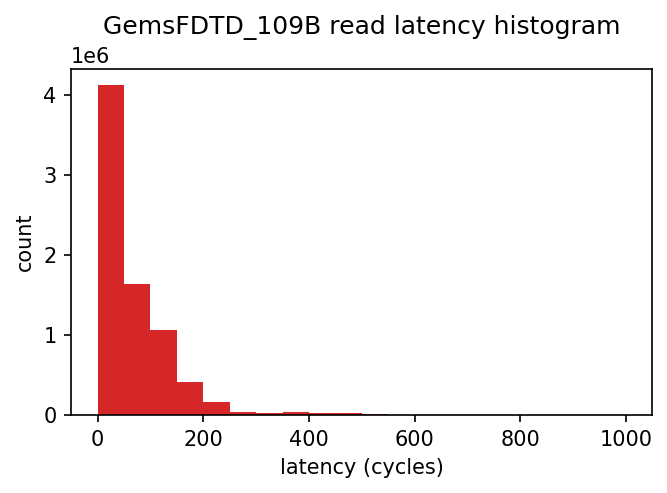

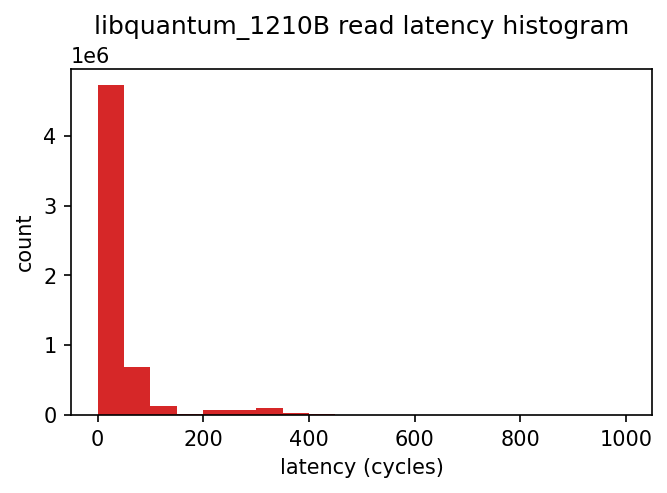

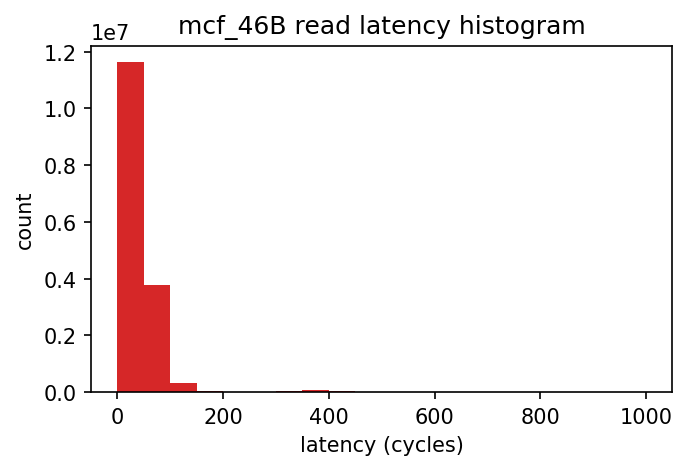

In [63]:
for benchmark, trace in traces.items():
    path = os.path.join(
        sim_dir, "dram_dramsim3", "default_1866", "baseline", "_baseline", benchmark, f"{trace}.dramsim3.json"
    )
    plot_latency_histogram(path, trace_name=trace, metric_name="write latency histogram")

## Interarrival latency histogram

### ChampSim

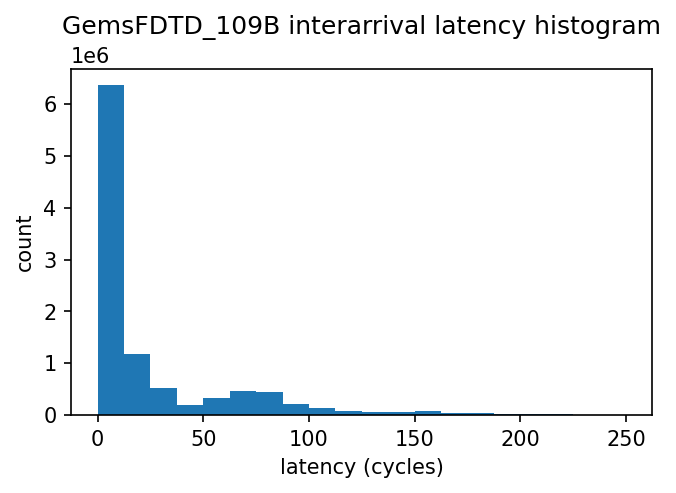

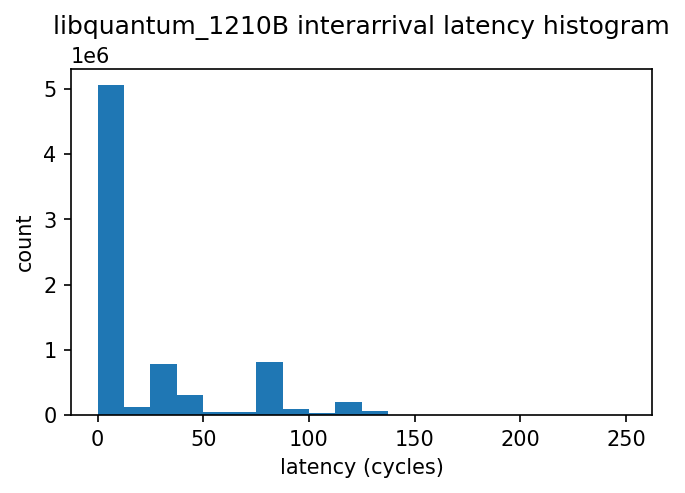

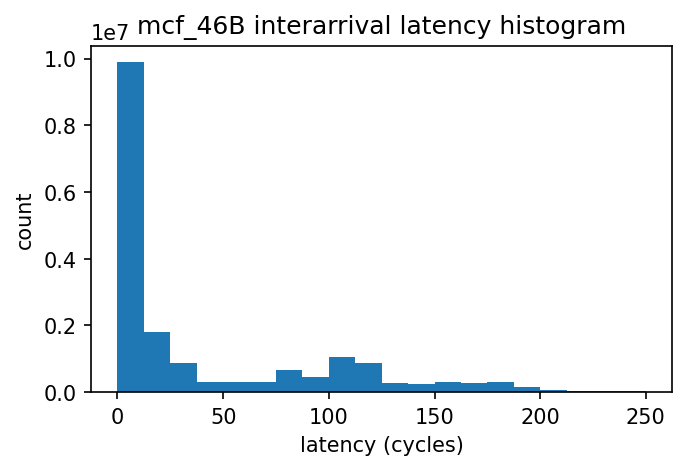

In [67]:
for benchmark, trace in traces.items():
    path = os.path.join(
        sim_dir, "dram_champsim", "default_1866", "baseline", "_baseline", benchmark, f"{trace}.json"
    )
    plot_latency_histogram(path, trace_name=trace, metric_name="interarrival latency histogram", max=250)

### DRAMsim3

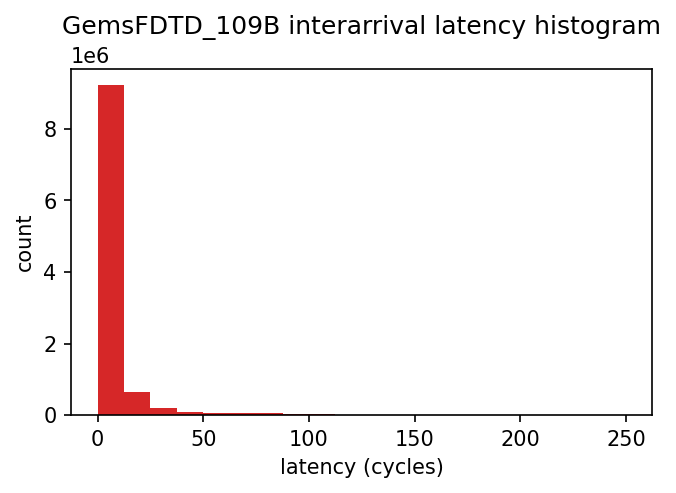

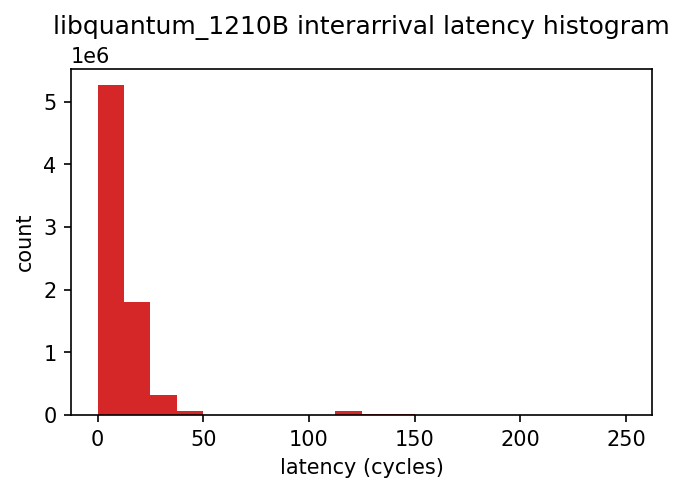

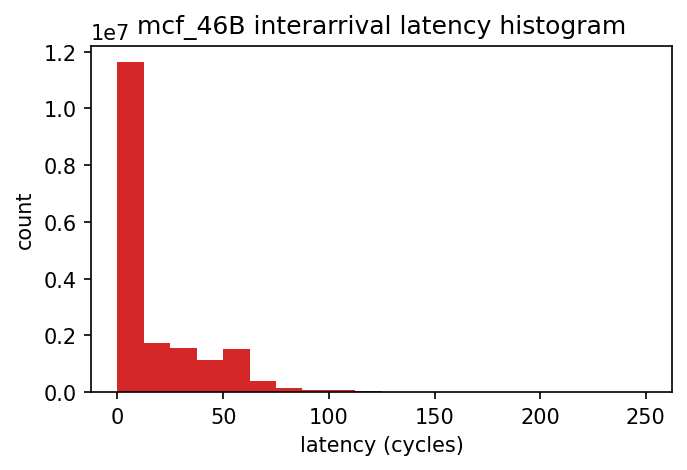

In [68]:
for benchmark, trace in traces.items():
    path = os.path.join(
        sim_dir, "dram_dramsim3", "default_1866", "baseline", "_baseline", benchmark, f"{trace}.dramsim3.json"
    )
    plot_latency_histogram(path, trace_name=trace, metric_name="interarrival latency histogram", max=250)